In [43]:
import pandas as pd
from glob import glob

In [134]:
foo = glob('results/run-*')
foo.sort()
foo

['results/run-Six_Bus_MVP1-baseline-DDPG_2019-03-19_213554.244485-tag-Avg_Reward_1.csv',
 'results/run-Six_Bus_MVP1-baseline-DDPG_2019-03-19_213554.244489-tag-Avg_Reward_1.csv',
 'results/run-Six_Bus_MVP1-baseline-DDPG_2019-03-19_213554.244527-tag-Avg_Reward_1.csv',
 'results/run-Six_Bus_MVP1-baseline-DDPG_2019-03-19_230518.447651-tag-Avg_Reward_1.csv',
 'results/run-Six_Bus_MVP1-baseline-DDPG_2019-03-19_230518.447778-tag-Avg_Reward_1.csv',
 'results/run-Six_Bus_MVP1-baseline-DDPG_2019-03-19_230518.448227-tag-Avg_Reward_1.csv',
 'results/run-Six_Bus_MVP2-baseline-DDPG_2019-03-18_211546.113627-tag-Avg_Reward_1.csv',
 'results/run-Six_Bus_MVP2-baseline-DDPG_2019-03-18_212211.801103-tag-Avg_Reward_1.csv',
 'results/run-Six_Bus_MVP2-baseline-DDPG_2019-03-19_213640.589033-tag-Avg_Reward_1.csv',
 'results/run-Six_Bus_MVP2-baseline-DDPG_2019-03-19_213647.105822-tag-Avg_Reward_1.csv',
 'results/run-Six_Bus_MVP2-baseline-DDPG_2019-03-19_213651.329213-tag-Avg_Reward_1.csv',
 'results/run-Six_Bus

In [137]:
results_files = glob('results/run-*')
results_files.sort()
scenarios = [fn.split('_')[2].split('-')[0] for fn in results_files]
keys = []
s1 = 0
s2 = 0
s3 = 0
s4 = 0
s5 = 0
for s in scenarios:
    if s == 'POC':
        s1 += 1
        keys.append('Scenario 1, run {}'.format(s1))
    if s == 'MVP1':
        s2 += 1
        keys.append('Scenario 2, run {}'.format(s2))
    if s == 'MVP2':
        s3 += 1
        keys.append('Scenario 3, run {}'.format(s3))
    if s == 'MVP3':
        s4 += 1
        keys.append('Scenario 4, run {}'.format(s4))
    if s == 'MVP4':
        s5 += 1
        keys.append('Scenario 5, run {}'.format(s5))
results = pd.concat([
    pd.read_csv(fn, index_col=1) for fn in results_files
], axis=1, keys=keys)
results[[col for col in results.columns if 'Scenario 4' in col[0] and col[1] == 'Value']] /= 2
results[[col for col in results.columns if 'Scenario 5' in col[0] and col[1] == 'Value']] /= 2
results[[col for col in results.columns if col[1] == 'Value']] /= (21 - .4)*60

In [132]:
results.head()

Scenario 2, run 1           Scenario 2, run 2            \
             Wall time     Value         Wall time     Value   
Step                                                           
0         1.553057e+09 -0.031283      1.553057e+09 -0.031451   
20        1.553057e+09 -0.027353      1.553057e+09 -0.031177   
40        1.553057e+09 -0.022804      1.553057e+09 -0.024272   
60        1.553057e+09 -0.021948      1.553057e+09 -0.021810   
80        1.553057e+09 -0.018540      1.553057e+09 -0.019628   

     Scenario 2, run 3           Scenario 2, run 4            \
             Wall time     Value         Wall time     Value   
Step                                                           
0         1.553057e+09 -0.030969      1.553062e+09 -0.030996   
20        1.553057e+09 -0.025361      1.553062e+09 -0.029159   
40        1.553057e+09 -0.022678      1.553062e+09 -0.022940   
60        1.553057e+09 -0.020667      1.553062e+09 -0.022077   
80        1.553057e+09 -0.020086      1.553062e+09 -0.020593   

     Scenario 2, run 5            ... Scenario 4, run 3            \
             Wall time     Value  ...         Wall time     Value   
Step                              ...                               
0         1.553062e+09 -0.031185  ...      1.552975e+09 -0.020704   
20        1.553062e+09 -0.032795  ...      1.552975e+09 -0.018689   
40        1.553062e+09 -0.031471  ...      1.552975e+09 -0.015433   
60        1.553062e+09 -0.029172  ...      1.552976e+09 -0.011261   
80        1.553062e+09 -0.025017  ...      1.552976e+09 -0.000578   

     Scenario 4, run 4           Scenario 1, run 1            \
             Wall time     Value         Wall time     Value   
Step                                                           
0         1.552975e+09 -0.022012      1.553031e+09 -0.025202   
20        1.552975e+09 -0.023640      1.553031e+09 -0.025118   
40        1.552975e+09 -0.017910      1.553032e+09 -0.022000   
60        1.552976e+09 -0.014171      1.553032e+09 -0.021628   
80        1.552976e+09 -0.002895      1.553032e+09 -0.019311   

     Scenario 1, run 2           Scenario 1, run 3            
             Wall time     Value         Wall time     Value  
Step                                                          
0         1.553031e+09 -0.025940      1.553031e+09 -0.025782  
20        1.553031e+09 -0.025097      1.553031e+09 -0.024673  
40        1.553032e+09 -0.021630      1.553032e+09 -0.023091  
60        1.553032e+09 -0.020242      1.553032e+09 -0.021439  
80        1.553032e+09 -0.019500      1.553032e+09 -0.019426  

[5 rows x 42 columns]

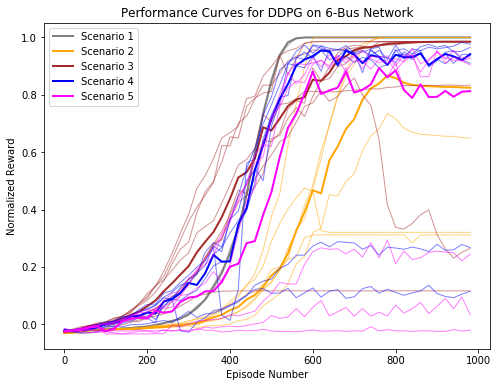

In [139]:
plt.figure(figsize=(8, 6))
colors = ['gray', 'orange', 'brown', 'blue', 'magenta']
for i in range(5):
    r = results[[col for col in results.columns if 'Scenario {}'.format(i+1) in col[0] and col[1] == 'Value']]
    med_r = np.median(r, axis=1)
    plt.plot(results.index, med_r, color=colors[i], label='Scenario {}'.format(i+1), linewidth=2)
    plt.plot(results.index, r.values, color=colors[i], alpha=0.5, linewidth=1)
plt.legend()
plt.ylabel('Normalized Reward')
plt.xlabel('Episode Number')
plt.title('Performance Curves for DDPG on 6-Bus Network');

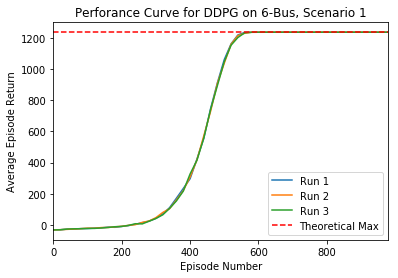

In [67]:
results.plot(y=[col for col in results.columns if col[1] == 'Value'])
plt.axhline((21 - .4)*60, color='red', ls='--')
labels = ['Run {}'.format(i+1) for i in range(3)]
labels.append('Theoretical Max')
plt.legend(labels)
plt.ylabel('Average Episode Return')
plt.xlabel('Episode Number')
plt.title('Perforance Curve for DDPG on 6-Bus, Scenario 1');

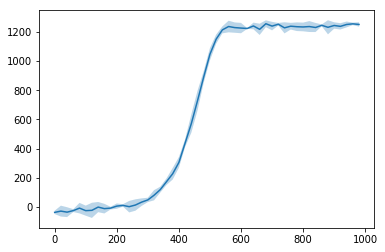

In [80]:
r = results[[col for col in results.columns if col[1] == 'Value']]
r += np.random.normal(0, 20, size=r.shape)
avg_r = np.average(r, axis=1)
std_r = np.std(r, axis=1)
plt.plot(results.index, avg_r)
plt.fill_between(results.index, avg_r - 2 * std_r, avg_r + 2 * std_r, alpha=0.3)

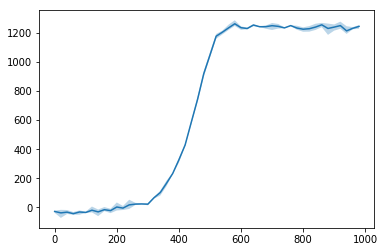

In [89]:
r = results[[col for col in results.columns if col[1] == 'Value']]
r += np.random.normal(0, 20, size=r.shape)
avg_r = np.average(r, axis=1)
std_r = np.median(r, axis=1)
plt.plot(results.index, avg_r)
plt.fill_between(results.index, np.min(r, axis=1), np.max(r, axis=1), alpha=0.3)

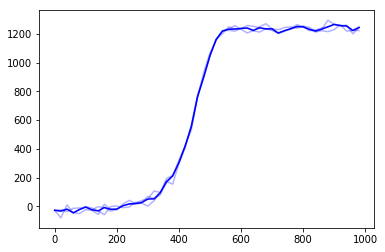

In [88]:
r = results[[col for col in results.columns if col[1] == 'Value']]
r += np.random.normal(0, 20, size=r.shape)
avg_r = np.median(r, axis=1)
std_r = np.std(r, axis=1)
plt.plot(results.index, avg_r, color='blue')
plt.plot(results.index, r.values, color='blue', alpha=0.3)